In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
plt.style.use(['science', 'retro'])

mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'DejaVu Sans'
mpl.rcParams['mathtext.it'] = 'DejaVu Sans:italic'
mpl.rcParams['mathtext.bf'] = 'DejaVu Sans:bold'

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = "DejaVu Sans"

plt.rc('text', usetex=True)
plt.rcParams['axes.linewidth'] = 1.2
mpl.rcParams['lines.linewidth'] = 2

In [3]:
df = {}
for i in range(1,5):
    df[i] = pd.read_csv(f"potential_5_{i}.txt", delim_whitespace=True)
    df[i].columns = df[i].columns.str.strip(",")

In [4]:
df[1].head()

,p,p',V11,V12,V21,V22
0,0.002248,0.002248,-1.076845,0.000013,0.000013,6.450193e-11
1,0.002248,0.011852,-1.076685,0.000351,0.000013,1.790904e-09
2,0.002248,0.029157,-1.075846,0.002119,0.000013,1.079940e-08
3,0.002248,0.054209,-1.073390,0.007292,0.000012,3.694621e-08
4,0.002248,0.087074,-1.067989,0.018625,0.000012,9.316973e-08


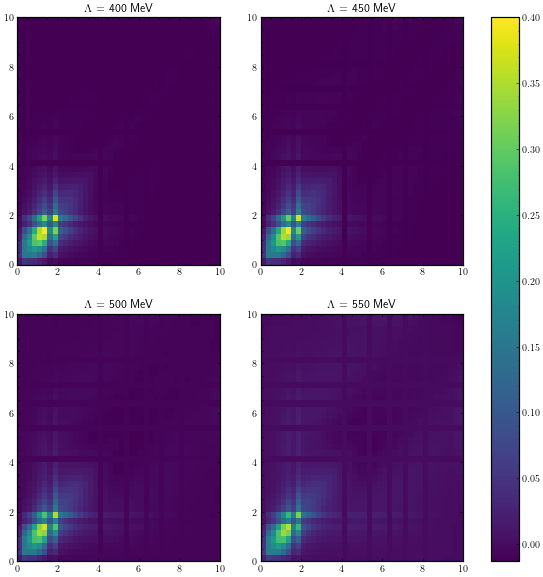

In [6]:
fig, ax = plt.subplots(2,2,figsize=(10,10))
for i in range(4):
    # for j in range(2):
    hist = ax[i//2, i%2].hist2d(df[i+1]["p"],df[i+1]["p'"], weights = df[i+1]["V22"],
                                bins=40, range=[[0,10], [0, 10]],
                               vmax=0.4)
    ax[i//2, i%2].set_title(f"$\Lambda$ = {350 + 50*(i+1)} MeV")
fig.colorbar(hist[3], ax=ax)
plt.show()

In [5]:
line_styles = {"LO": {"marker": "d", "markevery": 10, "markersize": 3, "color": "tab:cyan"},
               "NLO": {"marker": ".", "markevery": 10, "color": "orange"},
               "N2LO": {"ls":  (0, (5, 3)), "color": "green"},
               "N3LO": {"ls": "dotted", "color": "blue"},
               "N4LO": {"ls": (0, (5, 2, 0.8, 2, 0.8, 2)), "color": "red"},
               "N4LO+": {"color": "black"},
               "AV18": {"ls": (0, (5, 2, 1.3, 2,)), "color": "blueviolet"},
               "SIEGERT": {"color": "blue"},
               "1NC": {"color": "deeppink", "ls": "dashed"}
               }
ls_cutoff = {400: line_styles["N4LO"],
             450: line_styles["N4LO+"],
             500: line_styles["N2LO"],
             550: line_styles["N3LO"],
             }

In [6]:
pp = df[1]["p'"].unique()

In [7]:
pp[:22]

array([0.00224829, 0.01185243, 0.02915678, 0.05420926, 0.08707397,
       0.1278341 , 0.17659204, 0.23346926, 0.29860603, 0.37216106,
       0.45431096, 0.54524956, 0.64518701, 0.75434864, 0.87297344,
       1.00131223, 1.1396253 , 1.28817953, 1.44724479, 1.61708968,
       1.79797622, 1.99015358])

In [8]:
pp[20]

1.7979762177473533

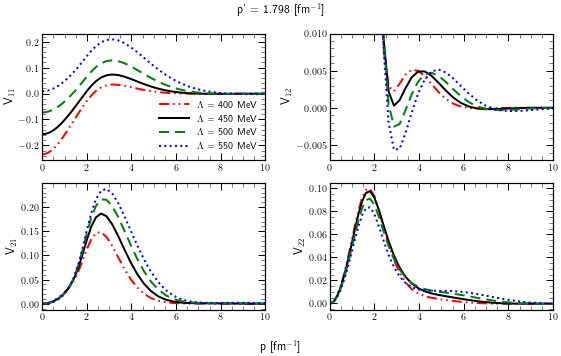

In [14]:
fig, ax = plt.subplots(2,2,figsize=(8,5))
pp_loc = pp[20]
fig.suptitle(f"p' = {round(pp_loc,3)} "+ "[fm$^{-1}$]", size=12)
fig.supxlabel("p [fm$^{-1}$]", size=12)
for i in range(4):
    for j in range(4):
        hist = ax[i//2, i%2].plot(df[j+1][df[j+1]["p'"] == pp_loc]["p"],
                                  df[j+1][df[j+1]["p'"] == pp_loc][f"V{i//2+1}{i%2+1}"],
                                  label=f"$\Lambda$ = {350 + 50*(j+1)} MeV",
                                 **ls_cutoff[350 + 50*(j+1)])
    ax[i//2, i%2].set_xlim([0, 10])
    ax[i//2, i%2].set_ylabel(f"V$_{{{i//2+1}{i%2+1}}}$", size=12)
    ax[i//2, i%2].tick_params(which='minor', direction='in', length=4,
                   width=0.5, top=True, right=True)
    ax[i//2, i%2].tick_params(which='major', direction='in',
                   length=7, width=1, top=True, right=True, zorder=1)
ax[0, 0].legend(fontsize=10, handlelength=3)
ax[0, 1].set_ylim([-7e-3, 1e-2])
# ax[0, 1].set_ylim([-1e-5, 1e-4])
# fig.colorbar(hist[3], ax=ax)
plt.tight_layout()
plt.savefig(f"potential_pp{round(pp_loc,3)}.pdf",
            dpi=600, facecolor="white")
plt.show()